In [1]:
# import modules
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('car_data.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,AnnualSalary,Purchased
53,23,56500,0
775,50,20000,1
338,61,49500,1
761,48,119000,1
443,37,146000,1


# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((700, 2), (300, 2))

# StandardScaler

In [6]:
# scaling : (value - mean)/standard_deviation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

# scaling
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
scaler.mean_

array([4.04671429e+01, 7.27292857e+04])

In [8]:
# Converting into Dataframe
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [9]:
X_train_scaled

,Age,AnnualSalary
0,0.991423,-1.474322
1,0.050156,-0.798018
2,-0.608731,1.202115
3,0.426663,2.266934
4,0.050156,-0.179272
...,...,...
695,0.144283,-0.553398
696,-1.361744,1.302841
697,1.932690,0.338748
698,-0.985238,-0.308777


[]

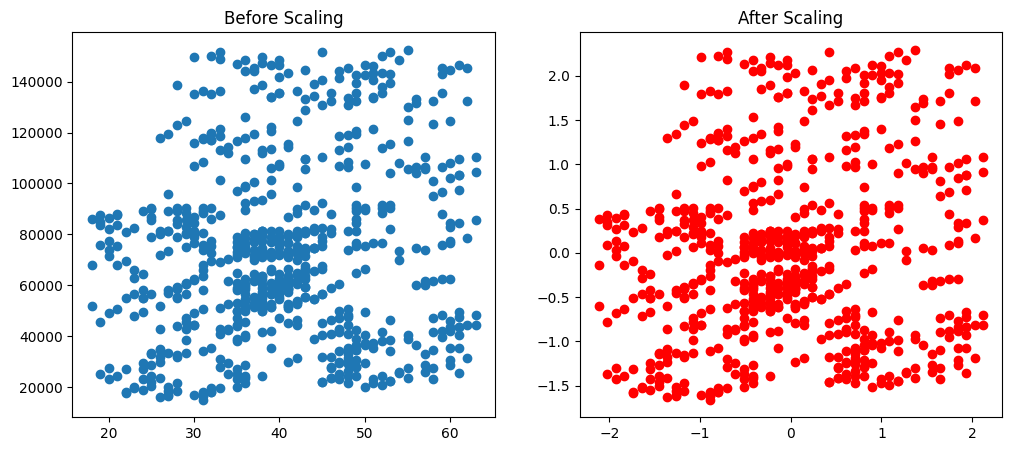

In [10]:
#Plotting scatter plot showing mean center property of Standardization
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['AnnualSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['AnnualSalary'],color='red')
ax2.set_title("After Scaling")
plt.plot()

<AxesSubplot: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

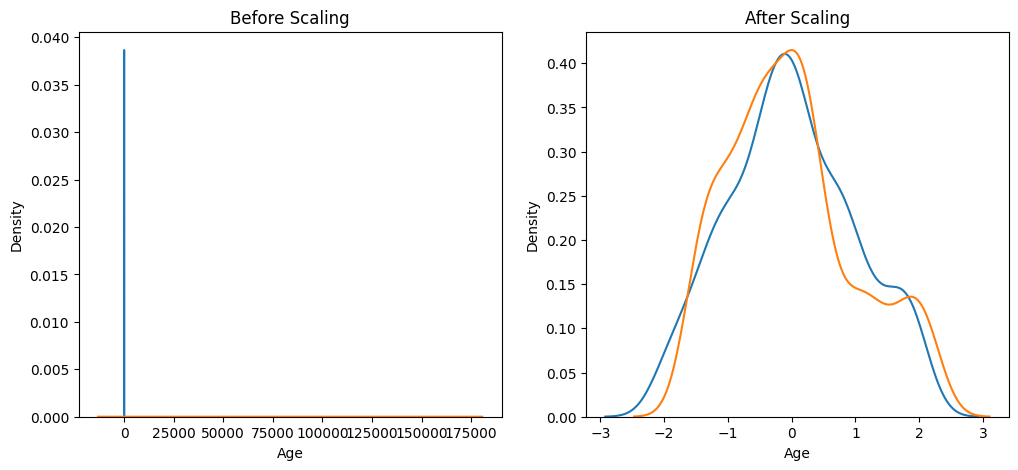

In [11]:
# PLotting subplot Before and After Scaling
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax1)
sns.kdeplot(X_train["AnnualSalary"],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax2)
sns.kdeplot(X_train_scaled["AnnualSalary"],ax=ax2)

<AxesSubplot: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

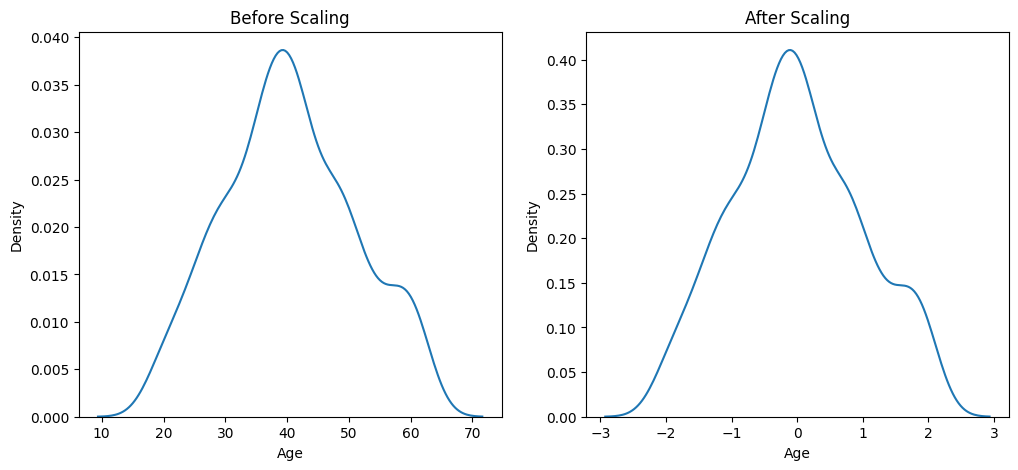

In [12]:
#Plotting Subplot for Age
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

<AxesSubplot: title={'center': 'After Scaling'}, xlabel='AnnualSalary', ylabel='Density'>

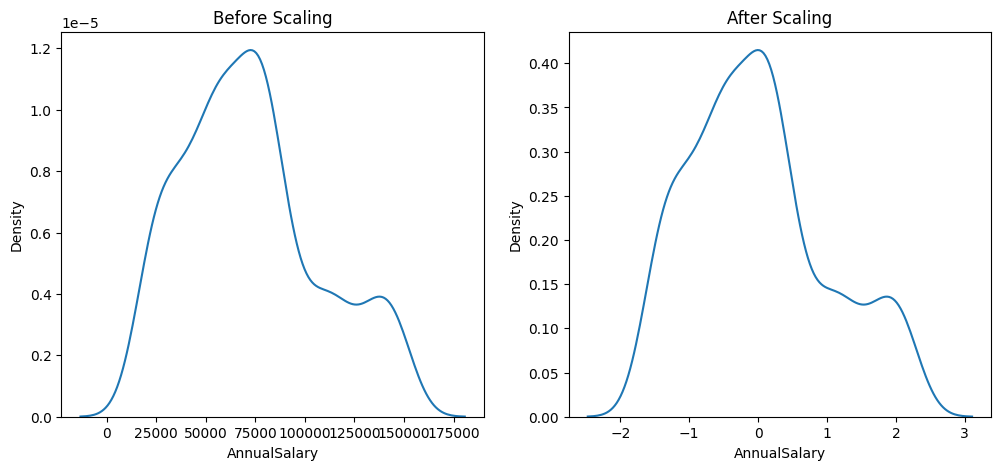

In [13]:
#Plotting Subplot for Annual Salary
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['AnnualSalary'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['AnnualSalary'],ax=ax2)

# Importance of Scaling

#     1. Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [16]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [17]:
# Prediction
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print("Actual", accuracy_score(y_test,y_pred))
print("Scaled", accuracy_score(y_test,y_pred_scaled))
# Scaling improves accuracy

Actual 0.59
Scaled 0.8266666666666667


# 2.Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier


In [21]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [22]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [23]:
# prediction
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [24]:
print("Actual", accuracy_score(y_test,y_pred))
print("Scaled", accuracy_score(y_test,y_pred_scaled))
# No effect of scaling

Actual 0.8666666666666667
Scaled 0.8533333333333334
